# MNIST Digit Classification using Decision Tree

This notebook demonstrates how to classify handwritten digits using a basic Decision Tree classifier from the `sklearn` library.

## Objectives:
- Train a Decision Tree classifier on the MNIST dataset.
- Visualize model performance using classification metrics and a confusion matrix.
- Analyze the limitations of Decision Trees on high-dimensional image data.

In [4]:
# Imports and dataset loading:

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the MNIST dataset:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print(f"Training set shape: {x_train.shape}")
print(f"Test set shape: {x_test.shape}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Training set shape: (60000, 28, 28)
Test set shape: (10000, 28, 28)


In [6]:
# Pre-processing the dataset:

# Normalizing the pixel values to [0, 1]:
x_train, x_test = x_train / 255.0, x_test / 255.0

# Flatten the images for the classifier:
train_2d = x_train.reshape((x_train.shape[0], -1))
test_2d = x_test.reshape((x_test.shape[0], -1))

In [7]:
# Initialize the Decision Tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Fit the model
clf.fit(train_2d, y_train)

# Make predictions
y_pred = clf.predict(test_2d)

In [8]:
# Evaluation

# Accuracy:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Classification report:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.88

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       980
           1       0.95      0.96      0.95      1135
           2       0.86      0.86      0.86      1032
           3       0.83      0.85      0.84      1010
           4       0.86      0.87      0.87       982
           5       0.85      0.83      0.84       892
           6       0.90      0.88      0.89       958
           7       0.91      0.90      0.91      1028
           8       0.82      0.81      0.81       974
           9       0.85      0.85      0.85      1009

    accuracy                           0.88     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.88      0.88      0.88     10000



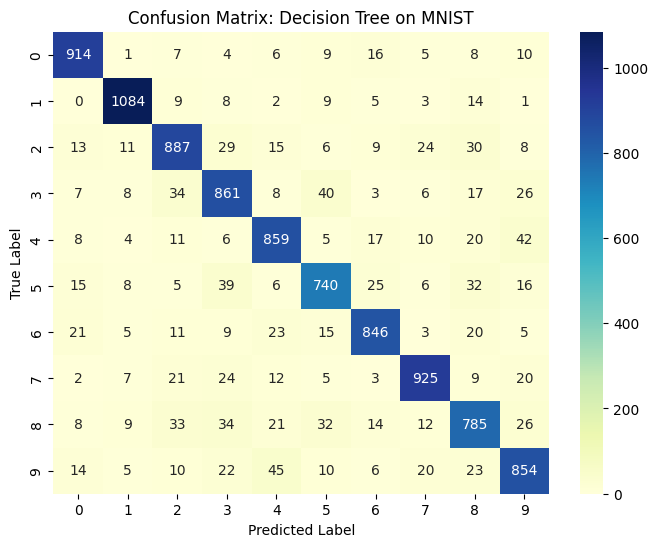

In [9]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Confusion Matrix: Decision Tree on MNIST')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()